# Boston Area Assessment

## Import Datasets

In [1]:
import pandas as pd
import numpy as np

In [2]:
price_dataset1 = pd.read_csv('../datasets/price_datasets/fy2015.csv')
price_dataset2 = pd.read_csv('../datasets/price_datasets/fy2016.csv')
price_dataset3 = pd.read_csv('../datasets/price_datasets/fy2017.csv')
price_dataset4 = pd.read_csv('../datasets/price_datasets/fy2018.csv')
price_dataset5 = pd.read_csv('../datasets/price_datasets/fy2019.csv')
price_dataset6 = pd.read_csv('../datasets/price_datasets/fy2020.csv')
price_dataset7 = pd.read_csv('../datasets/price_datasets/fy2021.csv')
price_dataset8 = pd.read_csv('../datasets/price_datasets/fy2022.csv')
price_dataset9 = pd.read_csv('../datasets/price_datasets/fy2023.csv')
price_dataset10 = pd.read_csv('../datasets/price_datasets/fy2024.csv')
price_dataset11 = pd.read_csv('../datasets/price_datasets/fy2025.csv')

/var/folders/jr/6hpd926x01q2bpbt1tt_p10m0000gn/T/ipykernel_40742/1096299413.py:2: DtypeWarning: Columns (60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  price_dataset2 = pd.read_csv('../datasets/price_datasets/fy2016.csv')
/var/folders/jr/6hpd926x01q2bpbt1tt_p10m0000gn/T/ipykernel_40742/1096299413.py:3: DtypeWarning: Columns (60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  price_dataset3 = pd.read_csv('../datasets/price_datasets/fy2017.csv')
/var/folders/jr/6hpd926x01q2bpbt1tt_p10m0000gn/T/ipykernel_40742/1096299413.py:4: DtypeWarning: Columns (15,60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  price_dataset4 = pd.read_csv('../datasets/price_datasets/fy2018.csv')
/var/folders/jr/6hpd926x01q2bpbt1tt_p10m0000gn/T/ipykernel_40742/1096299413.py:5: DtypeWarning: Columns (15,60) have mixed types. Specify dtype option on import or set low_memory=False.
  price_dataset5 = pd.read_csv('../da

## Preprocessing 1

In [3]:
for i in range(1,10):
    print(f"Dataset {i} shape: ", eval(f"price_dataset{i}.shape"))

print(f"Total rows in all datasets: {sum([eval(f'price_dataset{i}.shape[0]') for i in range(1,10)])}")

Dataset 1 shape:  (168115, 56)
Dataset 2 shape:  (169199, 77)
Dataset 3 shape:  (170910, 75)
Dataset 4 shape:  (172841, 75)
Dataset 5 shape:  (174668, 75)
Dataset 6 shape:  (175052, 75)
Dataset 7 shape:  (177091, 63)
Dataset 8 shape:  (178598, 64)
Dataset 9 shape:  (180627, 60)
Total rows in all datasets: 1567101


In [4]:
combined_price_data = pd.concat([eval(f"price_dataset{i}") for i in range(1,10)], ignore_index=True)
print("Combined dataset shape: ", combined_price_data.shape)

Combined dataset shape:  (1567101, 134)


In [5]:
combined_price_data.to_csv('../datasets/price_datasets/combined_price_data.csv', index=False)

In [6]:
combined_price_data.head()

,PID,CM_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,full_address,PTYPE,LU,...,NUM_PARKING,PROP_VIEW,CORNER_UNIT,RC_UNITS,ORIENTATION,ZIP_CODE,OWNER MAIL ADDRESS,EXT_FNISHED,KITCHENS,FIREPLACES
0,1302299000_,NaN,199,SAVIN HILL,AV,NaN,02125_,199 SAVIN HILL AV,105.0,R3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1302298000_,NaN,195,SAVIN HILL,AV,NaN,02125_,195 SAVIN HILL AV,104.0,R2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1302297000_,NaN,193,SAVIN HILL,AV,NaN,02125_,193 SAVIN HILL AV,104.0,R2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1302296000_,NaN,6 8,SOUTHVIEW,ST,NaN,02125_,6 8 SOUTHVIEW ST,104.0,R2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1302295000_,NaN,10 12,SOUTHVIEW,ST,NaN,02125_,10 12 SOUTHVIEW ST,104.0,R2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
combined_price_data["KITCHENS"].value_counts()

KITCHENS
1.0    100775
0.0     36984
2.0     17734
3.0     13896
4.0       123
5.0         1
Name: count, dtype: int64

In [8]:
# Since "TOTAL_VALUE" is a key column for price prediction, we keep the data points that have it
print(f"Null Values: {combined_price_data['TOTAL_VALUE'].isna().sum()}")

Null Values: 1041187


In [9]:
clean_combined_price_data = combined_price_data.dropna(subset=["TOTAL_VALUE"])
print("Cleaned combined dataset shape: ", clean_combined_price_data.shape)

Cleaned combined dataset shape:  (525914, 134)


In [10]:
# Convert TOTAL_VALUE to float after removing '$' and ',' for better numerical analysis
clean_combined_price_data["TOTAL_VALUE"] = clean_combined_price_data["TOTAL_VALUE"].astype(str).str.lstrip("$")
clean_combined_price_data['TOTAL_VALUE'] = clean_combined_price_data['TOTAL_VALUE'].replace('[\$,]', '', regex=True).astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/var/folders/jr/6hpd926x01q2bpbt1tt_p10m0000gn/T/ipykernel_40742/3931204353.py:3: SyntaxWarning: invalid escape sequence '\$'
  clean_combined_price_data['TOTAL_VALUE'] = clean_combined_price_data['TOTAL_VALUE'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/jr/6hpd926x01q2bpbt1tt_p10m0000gn/T/ipykernel_40742/3931204353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_price_data["TOTAL_VALUE"] = clean_combined_price_data["TOTAL_VALUE"].astype(str).str.lstrip("$")
/var/folders/jr/6hpd926x01q2bpbt1tt_p10m0000gn/T/ipykernel_40742/3931204353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [11]:
clean_combined_price_data = clean_combined_price_data.astype({'ZIPCODE': 'float64'})

In [12]:
clean_combined_price_data['ZIPCODE'] = clean_combined_price_data['ZIPCODE'].combine_first(clean_combined_price_data['ZIP_CODE'])
clean_combined_price_data = clean_combined_price_data.dropna(subset=['ZIPCODE'])
clean_combined_price_data['ZIPCODE'] = clean_combined_price_data['ZIPCODE'].astype('int16')

In [13]:
clean_combined_price_data.columns, len(clean_combined_price_data.columns)

(Index(['PID', 'CM_ID', 'ST_NUM', 'ST_NAME', 'ST_NAME_SUF', 'UNIT_NUM',
        'ZIPCODE', 'full_address', 'PTYPE', 'LU',
        ...
        'NUM_PARKING', 'PROP_VIEW', 'CORNER_UNIT', 'RC_UNITS', 'ORIENTATION',
        'ZIP_CODE', 'OWNER MAIL ADDRESS', 'EXT_FNISHED', 'KITCHENS',
        'FIREPLACES'],
       dtype='object', length=134),
 134)

# === Visualize Start Here ===

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")


In [15]:
for col in ["KITCHENS", "FIREPLACES", "SFYI_VALUE", " GROSS_TAX "]:
    if col in clean_combined_price_data.columns:
        print(f"\n=== {col} ===")
        print("Dtype:", clean_combined_price_data[col].dtype)
        print("Unique non-null values:", clean_combined_price_data[col].nunique())
        print("Sample values:", clean_combined_price_data[col].dropna().unique()[:10])



=== KITCHENS ===
Dtype: float64
Unique non-null values: 6
Sample values: [3. 2. 1. 4. 0. 5.]

=== FIREPLACES ===
Dtype: float64
Unique non-null values: 13
Sample values: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


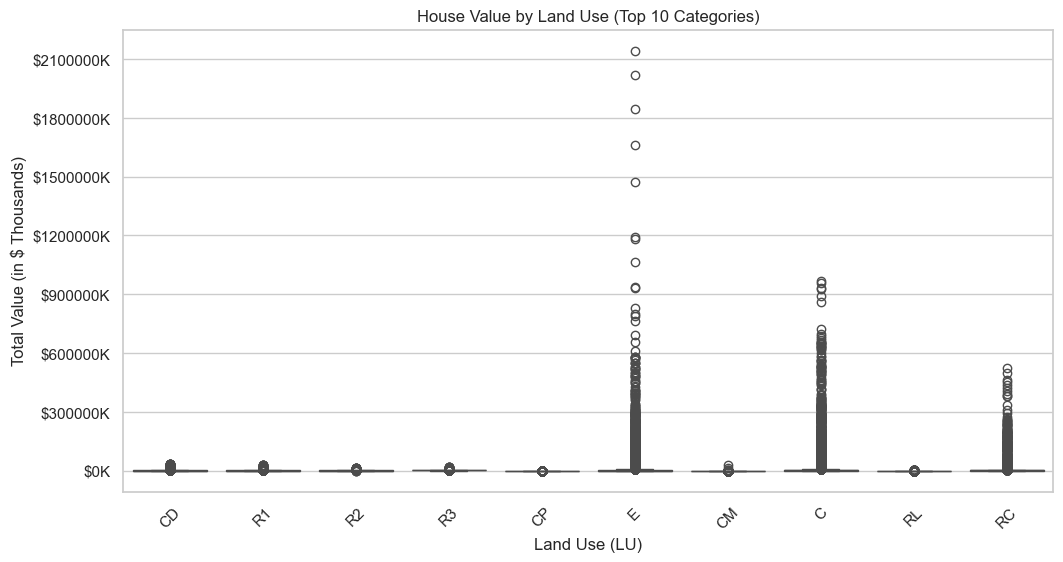

In [16]:
import matplotlib.ticker as mtick

plt.figure(figsize=(12,6))
top_lu = clean_combined_price_data["LU"].value_counts().head(10).index
subset = clean_combined_price_data[clean_combined_price_data["LU"].isin(top_lu)]

sns.boxplot(x="LU", y="TOTAL_VALUE", data=subset, order=top_lu)
plt.title("House Value by Land Use (Top 10 Categories)")
plt.xlabel("Land Use (LU)")
plt.ylabel("Total Value (in $ Thousands)")
plt.xticks(rotation=45)
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1e3:.0f}K'))
ax.yaxis.set_major_locator(mtick.MaxNLocator(8)) 

plt.show()

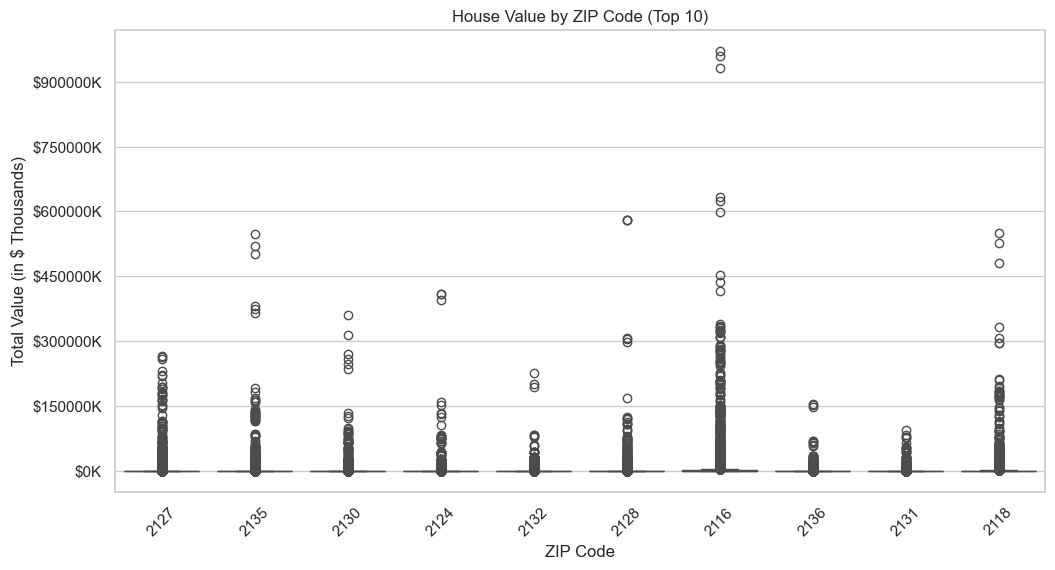

In [17]:
plt.figure(figsize=(12,6))

clean_combined_price_data["ZIPCODE"] = clean_combined_price_data["ZIPCODE"].astype(str)
top_zip = clean_combined_price_data["ZIPCODE"].value_counts().head(10).index
subset = clean_combined_price_data[clean_combined_price_data["ZIPCODE"].isin(top_zip)]

sns.boxplot(x="ZIPCODE", y="TOTAL_VALUE", data=subset, order=top_zip)
plt.title("House Value by ZIP Code (Top 10)")
plt.xlabel("ZIP Code")
plt.ylabel("Total Value (in $ Thousands)")
plt.xticks(rotation=45)
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1e3:.0f}K'))
ax.yaxis.set_major_locator(mtick.MaxNLocator(8))

plt.show()

Top numeric features for histograms: ['LAND_SF', 'GROSS_AREA', 'LIVING_AREA', 'COM_UNITS', 'LUC', 'YR_BUILT']


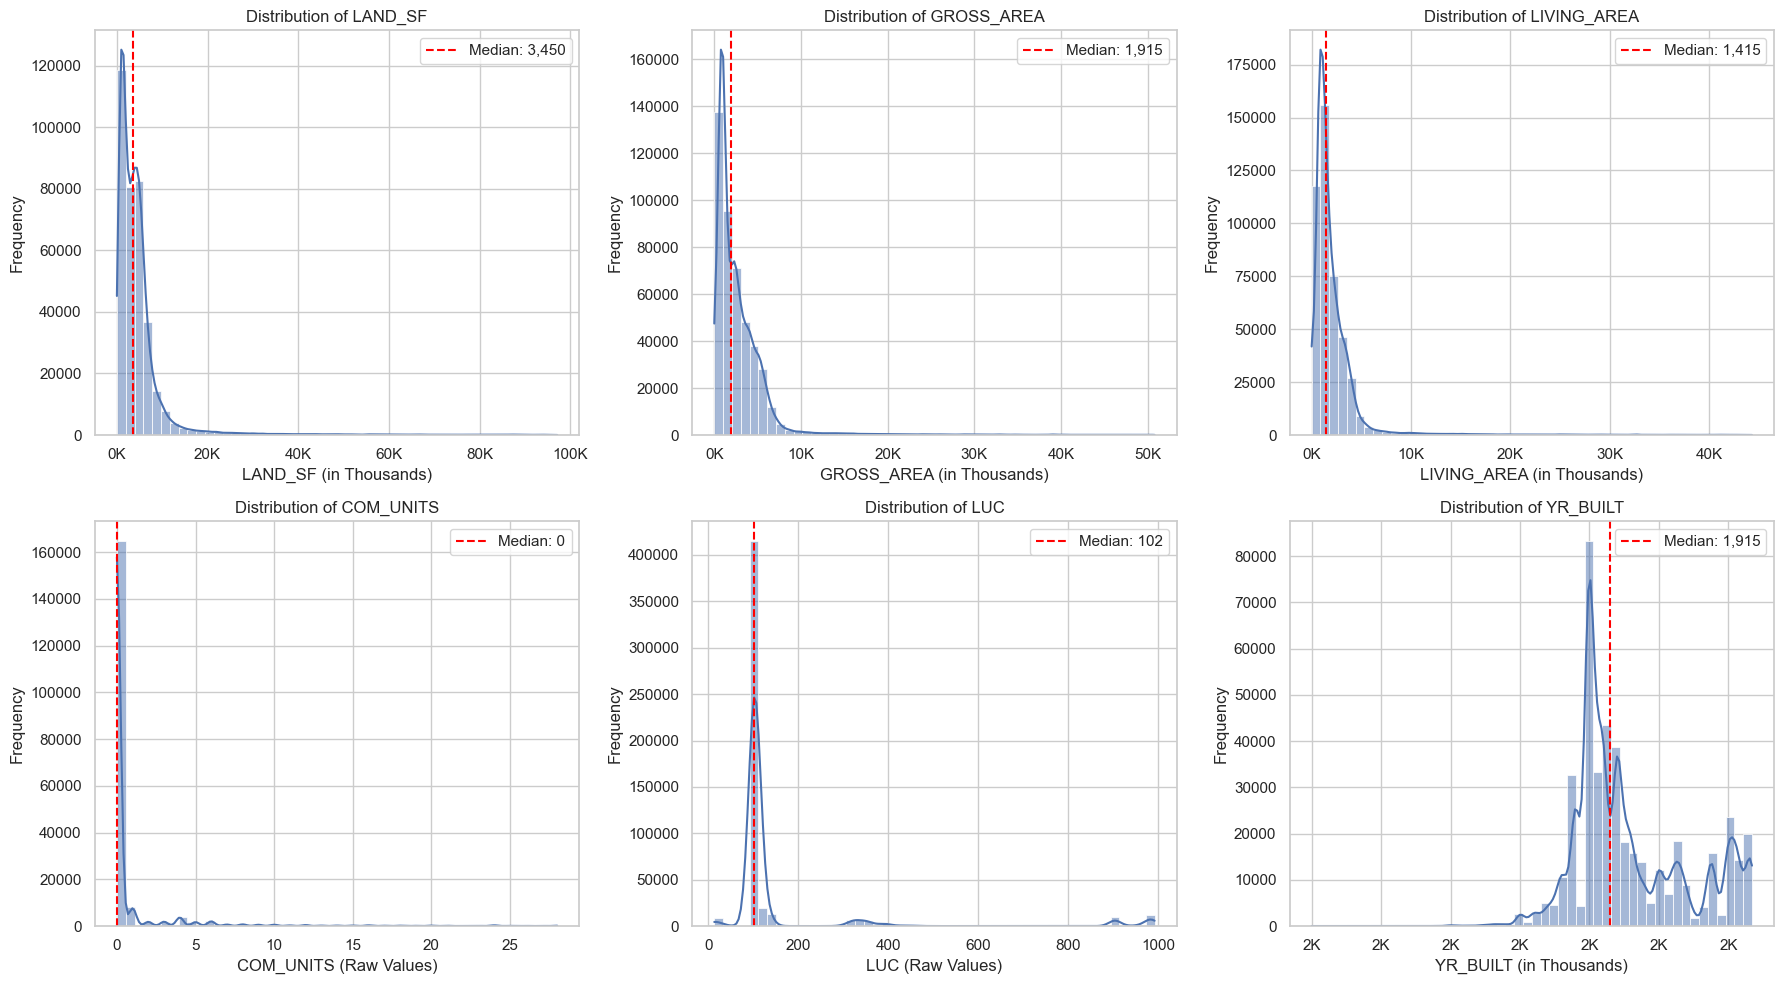

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick

numeric_cols = clean_combined_price_data.select_dtypes(include=[np.number]).columns.tolist()
variances = clean_combined_price_data[numeric_cols].var().sort_values(ascending=False)
top_features = [c for c in variances.index if c != "TOTAL_VALUE"][:6]

print("Top numeric features for histograms:", top_features)
fig, axes = plt.subplots(2, 3, figsize=(18,10))
axes = axes.flatten()
for i, col in enumerate(top_features):
    series = clean_combined_price_data[col].dropna()
    cutoff = np.percentile(series, 99)
    series = series[series < cutoff]
    median_val = series.median()
    sns.histplot(series, bins=50, kde=True, ax=axes[i])
    axes[i].axvline(median_val, color="red", linestyle="--", label=f"Median: {median_val:,.0f}")
    axes[i].set_title(f"Distribution of {col}")
    if series.max() > 1e6:   
        axes[i].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
        axes[i].set_xlabel(f"{col} (in Millions)")
    elif series.max() > 1e3:
        axes[i].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e3:.0f}K'))
        axes[i].set_xlabel(f"{col} (in Thousands)")
    else:
        axes[i].set_xlabel(f"{col} (Raw Values)")
    axes[i].set_ylabel("Frequency")
    axes[i].legend()
    
plt.tight_layout()
plt.show()


/var/folders/jr/6hpd926x01q2bpbt1tt_p10m0000gn/T/ipykernel_40742/2853100186.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


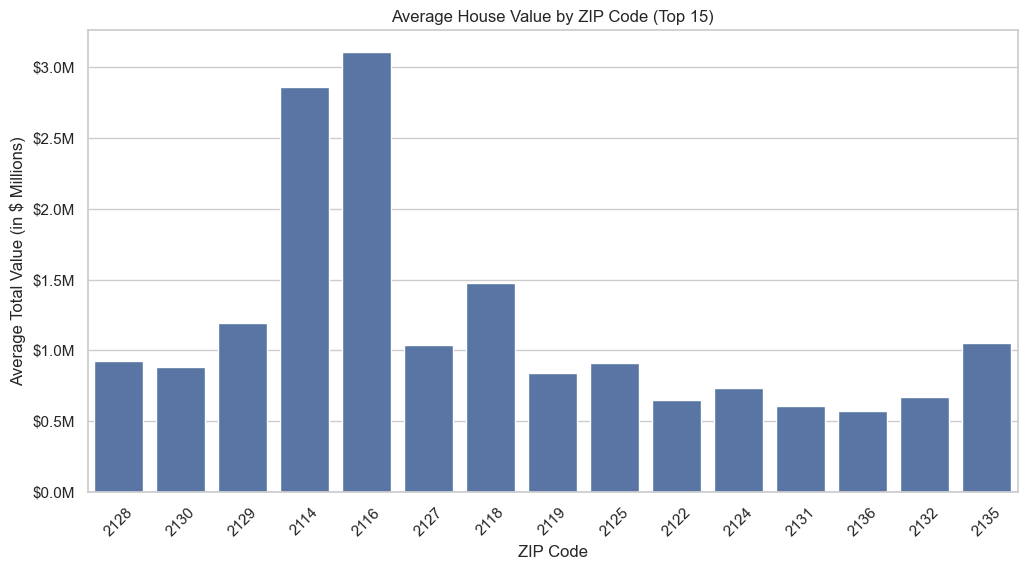

In [19]:
import matplotlib.ticker as mtick

if "ZIPCODE" in clean_combined_price_data.columns:
    
    top_zips = clean_combined_price_data["ZIPCODE"].value_counts().head(15).index
    subset = clean_combined_price_data[clean_combined_price_data["ZIPCODE"].isin(top_zips)]

    plt.figure(figsize=(12,6))
    sns.barplot(
        x="ZIPCODE", 
        y="TOTAL_VALUE", 
        data=subset, 
        estimator="mean", 
        ci=None
    )

    plt.title("Average House Value by ZIP Code (Top 15)")
    plt.xlabel("ZIP Code")
    ax = plt.gca()
    max_val = subset["TOTAL_VALUE"].max()

    if max_val > 1e6:
        ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))
        plt.ylabel("Average Total Value (in $ Millions)")
    elif max_val > 1e3:
        ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1e3:.0f}K'))
        plt.ylabel("Average Total Value (in $ Thousands)")
    else:
        plt.ylabel("Average Total Value ($)")

    plt.xticks(rotation=45)
    plt.show()
else:
    print("ZIPCODE column not found in dataset.")


# === Visualize Ends Here ===

In [20]:
# Drop columns that are completely empty
clean_combined_price_data = clean_combined_price_data.dropna(axis=1, how='all')

# Replace 'RL - RL' with 'RL' to remove data entry duplication and filter rows based on 'LU' values
clean_combined_price_data['LU'] = clean_combined_price_data['LU'].replace('RL - RL', 'RL')
valid_values = ['R1', 'R2', 'R3', 'R4', 'A', 'CD', 'CM', 'RC', 'RL', 'AH', 'EA']
clean_combined_price_data = clean_combined_price_data[clean_combined_price_data['LU'].isin(valid_values)]

clean_combined_price_data.shape


(455212, 70)

In [21]:
# Removing the text based LU and LU_DESC columns and keping only the numeric LUC column for Land Use code for modeling
clean_combined_price_data = clean_combined_price_data.drop(columns=['LU', 'LU_DESC'])

# Check dtype and sample values for TOTAL_VALUE only in clean_combined_price_data
if "clean_combined_price_data" in globals() and "TOTAL_VALUE" in clean_combined_price_data.columns:
    print("TOTAL_VALUE dtype:", clean_combined_price_data["TOTAL_VALUE"].dtype)
    print("Sample:", clean_combined_price_data["TOTAL_VALUE"].head(3).tolist())
else:
    print("clean_combined_price_data or TOTAL_VALUE column not found.")

# Handling YR_REMODEL and YR_BUILT columns to create a new clean YR_LATEST_DEVELOPED column
clean_combined_price_data['YR_REMODEL'] = clean_combined_price_data['YR_REMODEL'].fillna(clean_combined_price_data['YR_BUILT'])
clean_combined_price_data.rename(columns={'YR_REMODEL': 'YR_LATEST_DEVELOPED'}, inplace=True)
clean_combined_price_data.drop(columns=['YR_BUILT'], inplace=True)
# Drop rows with missing YR_LATEST_DEVELOPED and convert to int
clean_combined_price_data = clean_combined_price_data.dropna(subset=["YR_LATEST_DEVELOPED"])
clean_combined_price_data["YR_LATEST_DEVELOPED"] = clean_combined_price_data["YR_LATEST_DEVELOPED"].astype(int)
# Replace missing values with 0 in column: 'RES_FLOOR'
clean_combined_price_data = clean_combined_price_data.fillna({'RES_FLOOR': 0})
print("Cleaned combined dataset shape: ", clean_combined_price_data.shape)

TOTAL_VALUE dtype: float64
Sample: [719400.0, 744800.0, 730500.0]
Cleaned combined dataset shape:  (434104, 67)


In [22]:
clean_combined_price_data.drop(columns=['PID', 'CM_ID', 'ST_NUM', 'ST_NAME', 'UNIT_NUM', 'OWNER', 'GIS_ID', 'MAIL_ADDRESSEE', 'MAIL_ADDRESS', 'MAIL_ZIPCODE', 'CITY', 'BLDG_SEQ', 'BLDG_TYPE', 'MAIL_CITY', 'MAIL_STATE', 'CD_FLOOR', 'RES_UNITS', 'COM_UNITS', 'LAND_VALUE', 'BLDG_VALUE', 'ROOF_STRUCTURE', 'ROOF_COVER', 'INT_WALL', 'EXT_FINISHED', 'INT_COND', 'EXT_COND', 'OVERALL_COND', 'BDRM_COND', 'PlUMBING', 'CORNER_UNIT', 'RC_UNITS', 'ORIENTATION', 'ZIP_CODE', 'OWNER MAIL ADDRESS', 'EXT_FNISHED', 'KITCHEN_STYLE1', 'KITCHEN_STYLE2', 'KITCHEN_STYLE3'], inplace=True)

In [ ]:
# Drop LAND_SF and STRUCTURE_CLASS columns
clean_combined_price_data = clean_combined_price_data.drop(columns=["LAND_SF", "STRUCTURE_CLASS"])
# Drop rows where TOTAL_VALUE is 0
clean_combined_price_data = clean_combined_price_data[clean_combined_price_data['TOTAL_VALUE'] != 0]
# Drop rows where TT_RMS is 0 and missing
clean_combined_price_data = clean_combined_price_data[(clean_combined_price_data['TT_RMS'] != 0) & (clean_combined_price_data['TT_RMS'].notna())]
# Drop rows with missing BED_RMS values
clean_combined_price_data = clean_combined_price_data.dropna(subset=['BED_RMS'])
# Drop the HEAT_FUEL column due to missing values
clean_combined_price_data = clean_combined_price_data.drop(columns=['HEAT_FUEL'])
# Drop BTHRM_STYLE1, BTHRM_STYLE2, BTHRM_STYLE3 columns as they are text based, have many missing values and not needed from the user
clean_combined_price_data = clean_combined_price_data.drop(columns=["BTHRM_STYLE1", "BTHRM_STYLE2", "BTHRM_STYLE3"])
# Merge duplicate KITCHEN and KITCHENS columns into one
clean_combined_price_data['KITCHENS'] = clean_combined_price_data[['KITCHEN', 'KITCHENS']].sum(axis=1, skipna=True)
clean_combined_price_data.drop(columns=['KITCHEN'], inplace=True)
# Merge duplicate FIRE_PLACE and FIREPLACES into FIREPLACES
clean_combined_price_data['FIREPLACES'] = clean_combined_price_data[['FIRE_PLACE', 'FIREPLACES']].sum(axis=1, skipna=True)
clean_combined_price_data.drop(columns=['FIRE_PLACE'], inplace=True)
# Replace missing values with 0 in column: 'NUM_PARKING'
clean_combined_price_data = clean_combined_price_data.fillna({'NUM_PARKING': 0})
# Replace missing values with 0 in column: 'NUM_PARKING'
clean_combined_price_data = clean_combined_price_data.fillna({'NUM_PARKING': 0})
# Replace Y with 1 and N with -1 in OWN_OCC
clean_combined_price_data['OWN_OCC'] = clean_combined_price_data['OWN_OCC'].replace({'Y': 1, 'N': -1})
# Drop the few rows with missing LIVING_AREA values
clean_combined_price_data = clean_combined_price_data.dropna(subset=['LIVING_AREA'])
# Drop rows where both FULL_BTH and HLF_BTH are missing
clean_combined_price_data = clean_combined_price_data.dropna(subset=["FULL_BTH", "HLF_BTH"], how="all")
# Replace gaps forward from the previous valid value in: 'FULL_BTH'
clean_combined_price_data = clean_combined_price_data.fillna({'FULL_BTH': clean_combined_price_data['FULL_BTH'].ffill()})
# Drop rows with missing AC_TYPE values
clean_combined_price_data = clean_combined_price_data.dropna(subset=['AC_TYPE'])
# Fill missing HLF_BTH with TT_RMS - BED_RMS - FULL_BTH - KITCHENS
clean_combined_price_data['HLF_BTH'] = clean_combined_price_data['HLF_BTH'].fillna(clean_combined_price_data['TT_RMS'] - clean_combined_price_data['BED_RMS'] - clean_combined_price_data['FULL_BTH'] - clean_combined_price_data['KITCHENS'])
# Replace missing values with the most common value of each column in: 'PROP_VIEW'
clean_combined_price_data = clean_combined_price_data.fillna({'PROP_VIEW': clean_combined_price_data['PROP_VIEW'].mode()[0]})
# Replace missing values with the most common value of each column in: 'KITCHEN_TYPE'
clean_combined_price_data = clean_combined_price_data.fillna({'KITCHEN_TYPE': clean_combined_price_data['KITCHEN_TYPE'].mode()[0]})
# Fill missing HLF_BTH with TT_RMS - BED_RMS - FULL_BTH - KITCHENS
clean_combined_price_data['HLF_BTH'] = clean_combined_price_data['HLF_BTH'].fillna(clean_combined_price_data['TT_RMS'] - clean_combined_price_data['BED_RMS'] - clean_combined_price_data['FULL_BTH'] - clean_combined_price_data['KITCHENS'])

clean_combined_price_data['GROSS_TAX'] = clean_combined_price_data['GROSS_TAX'].astype(str).str.lstrip("$")
clean_combined_price_data['GROSS_TAX'] = clean_combined_price_data['GROSS_TAX'].replace('[\$,]', '', regex=True).astype(float)

/var/folders/jr/6hpd926x01q2bpbt1tt_p10m0000gn/T/ipykernel_40742/3087319710.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_combined_price_data['OWN_OCC'] = clean_combined_price_data['OWN_OCC'].replace({'Y': 1, 'N': -1})


In [24]:
# Replace distinct values of the text based columns with integers based on price effect
kitchen_type_mapping = (
    clean_combined_price_data.groupby('KITCHEN_TYPE')['TOTAL_VALUE']
    .mean()
    .sort_values()
    .reset_index()
    .assign(Mapping=range(-4, 6))
    .set_index('KITCHEN_TYPE')['Mapping']
    .to_dict()
)
ac_mapping = {
    'N - None': -1, 
    'C - Central AC': 2, 
    'D - Ductless AC': 1,
    'Y - Yes': 0
}
heat_mapping = {
    'W - Ht Water/Steam': -2,
    'F - Forced Hot Air': 1,
    'S - Space Heat': -1,
    'E - Electric': -3,
    'N - None': 0,
    'P - Heat Pump': 2,
    'O - Other': 3
}
prop_view_mapping = {
    "S - Special":   3,
    "E - Excellent": 2,
    "G - Good":      1,
    "A - Average":   0,  # default if user input missing
    "F - Fair":     -1,
    "P - Poor":     -2,
}
clean_combined_price_data["PROP_VIEW"] = clean_combined_price_data["PROP_VIEW"].map(prop_view_mapping)
clean_combined_price_data["HEAT_TYPE"] = clean_combined_price_data["HEAT_TYPE"].map(heat_mapping)
clean_combined_price_data["AC_TYPE"] = clean_combined_price_data["AC_TYPE"].map(ac_mapping)
clean_combined_price_data['KITCHEN_TYPE'] = clean_combined_price_data['KITCHEN_TYPE'].map(kitchen_type_mapping)

In [25]:
clean_combined_price_data.shape

(387636, 21)

In [26]:
clean_combined_price_data.to_csv('../datasets/price_datasets/cleaned_combined_price_data.csv', index=False)